In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor

<Axes: xlabel='id', ylabel='target'>

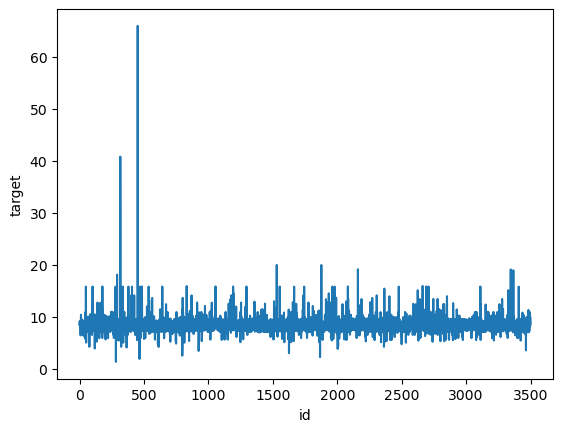

In [2]:
data = pd.read_csv('sample_submission.csv')
sns.lineplot(data=data, x='id',y='target')

<Axes: xlabel='id', ylabel='target'>

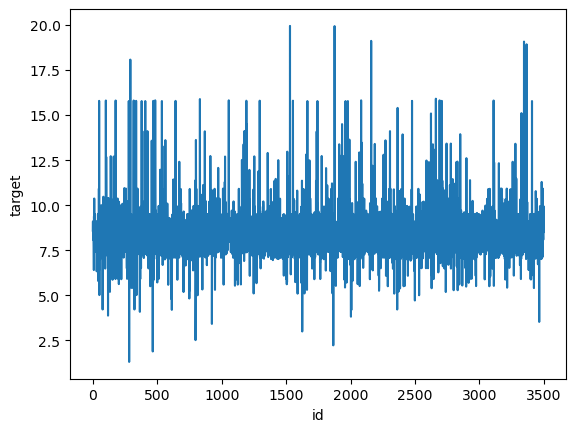

In [3]:
data = pd.read_csv('sample_submission.csv')
sns.lineplot(data=data[data.target < 20], x='id',y='target')

In [4]:
len(data[data.target >= 20])
# Only two point more than 20, about 0.05 percent

2

In [5]:
train_data = data[(data.target>20)]
remaining_data = data[data.target<=20]

In [6]:
train_data
# Index of these outliers are 316 and 451

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
316,316,40.78,40.90,40.90,9.500,6.805,5.01,8.76,6.805,0.49,...,9.805,4.53,4.42,4.8,3.500,4.650,6.025,5.070,3.850,4.14
451,451,65.93,40.95,65.95,9.265,6.625,5.01,8.37,6.375,0.71,...,7.795,1.73,1.78,4.1,4.645,4.725,5.725,10.645,3.025,3.80


In [7]:
X_train, X_test, y_train, y_test = train_test_split(remaining_data.drop(['target'], axis = 1), remaining_data.loc[:,'target'], test_size=700, random_state=42)

# We add outliers without any change to the training dataset, by first concatinating of X and y and adding outliers.
data_train = pd.concat([X_train,y_train],axis=1)
data_train = pd.concat([data_train,train_data],axis=0)

# Cutting the target with reamining independent variables
X_train = data_train.drop(['target'], axis = 1)
y_train = data_train.loc[:,'target']

In [8]:
print(X_train.shape)
print(X_test.shape)

(2800, 36)
(700, 36)


## Features importance

In [ ]:
rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X,y)
importances = rf.feature_importances_

In [ ]:
columns = X.columns
importance_dict = dict()
for i in range(len(columns)):
    importance_dict[columns[i]] = importances[i]
importance_desc = dict(sorted(importance_dict.items(), key = lambda x:x[1], reverse=True))
importance_asc = dict(sorted(importance_dict.items(), key = lambda x:x[1], reverse=False))
print(importance_desc)

In [9]:
X = data.drop(['id','target'],axis=1)
y = data.loc[:,'target']

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
rf.fit(X,y)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [10]:
importances = rf.feature_importances_

In [12]:
importances

array([0.51024213, 0.28762549, 0.00269115, 0.00692335, 0.00525149,
       0.00357076, 0.00382619, 0.00486579, 0.00402868, 0.00329941,
       0.00318646, 0.00421231, 0.00937029, 0.00166934, 0.00320878,
       0.01030625, 0.0025515 , 0.00232225, 0.00324723, 0.00542798,
       0.00346274, 0.00244368, 0.00284322, 0.00286555, 0.00244421,
       0.00268283, 0.00653094, 0.0051772 , 0.00317943, 0.0032261 ,
       0.00404625, 0.00292441, 0.07524342, 0.0031417 , 0.00196149])

In [13]:
columns = X.columns
importance_dict = dict()
for i in range(len(columns)):
    importance_dict[columns[i]] = importances[i]
importance_desc = dict(sorted(importance_dict.items(), key = lambda x:x[1], reverse=True))
importance_asc = dict(sorted(importance_dict.items(), key = lambda x:x[1], reverse=False))
print(importance_desc)

{'O2_1': 0.510242131965826, 'O2_2': 0.28762549065295057, 'BOD5_5': 0.07524341738678388, 'NO2_2': 0.010306253374861931, 'NH4_6': 0.0093702868114113, 'O2_4': 0.00692334930170189, 'NO3_6': 0.006530943461614802, 'NO2_6': 0.005427981368869007, 'O2_5': 0.005251489526629429, 'NO3_7': 0.0051772033868603485, 'NH4_1': 0.004865785452979363, 'NH4_5': 0.0042123075658001465, 'BOD5_3': 0.004046248355881684, 'NH4_2': 0.004028682778721372, 'O2_7': 0.003826189675266492, 'O2_6': 0.0035707569253078603, 'NO2_7': 0.0034627356815102946, 'NH4_3': 0.0032994127879192496, 'NO2_5': 0.0032472325438998783, 'BOD5_2': 0.0032261002665061856, 'NO2_1': 0.003208782489261178, 'NH4_4': 0.003186462461765148, 'BOD5_1': 0.0031794311408640994, 'BOD5_6': 0.003141701501724555, 'BOD5_4': 0.002924408925916154, 'NO3_3': 0.0028655478829749557, 'NO3_2': 0.002843220339730728, 'O2_3': 0.0026911520751446818, 'NO3_5': 0.0026828272608995555, 'NO2_3': 0.0025514985816501435, 'NO3_4': 0.002444210677857347, 'NO3_1': 0.002443677548009965, 'NO2

In [14]:
svm = SGDOneClassSVM(nu=0.1).fit(data.drop(['id'],axis=1))
data['svm_anomaly'] = svm.predict(data.drop(['id'],axis=1))
len(np.where(data['svm_anomaly']==-1)[0])

5

In [15]:
If = IsolationForest(contamination=0.005).fit(data.drop(['id','svm_anomaly'],axis=1))
data['if_anomaly'] = If.predict(data.drop(['id','svm_anomaly'],axis=1))
len(np.where(data['if_anomaly']==-1)[0])

/Users/ameerramzani/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


18

In [16]:
lof = LocalOutlierFactor(contamination=0.005)
data['lof_anomaly'] = lof.fit_predict(data.drop(['id','svm_anomaly','if_anomaly'],axis=1))
len(np.where(data['lof_anomaly']==-1)[0])

18

In [ ]:
# !pip install git+https://github.com/cleanlab/cleanlab.git
# from cleanlab.regression.learn import CleanLearning

  Cloning https://github.com/cleanlab/cleanlab.git to /private/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/pip-req-build-o_oc2iro
  Running command git clone --filter=blob:none --quiet https://github.com/cleanlab/cleanlab.git /private/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/pip-req-build-o_oc2iro
  Resolved https://github.com/cleanlab/cleanlab.git to commit b2c28d29172667bc04499087442795e21a33d13a
  Installing build dependencies ... |

In [ ]:
# rf = RandomForestRegressor(
#        n_estimators=1000,
#        max_depth=7,
#        n_jobs=-1,
#        random_state=42
#     )
# crf = CleanLearning(rf)
# crf.fit(data.loc[:,['O2_1','O2_2','BOD5_5']],data.loc[:,'target'].clip(7,20))
# label_issues = crf.get_label_issues()

In [ ]:
# lowest_quality_labels = label_issues["label_quality"].argsort()[:20].to_numpy()
# print(f'lowest_quality_labels: {lowest_quality_labels}')

In [ ]:
lowest_quality_labels = [3366, 2365,  465, 1776, 1295,  800, 2306,  402, 1215, 1737, 3212,  529,  482, 2068, 1163, 1408, 2246, 1681,  162]

np.union will return sorted union of two arrays, much like sets in python

In [19]:
rows_to_remove = np.union1d(np.union1d(np.union1d( np.where(data['svm_anomaly']==-1), np.where(data['if_anomaly']==-1)), np.where(data['lof_anomaly']==-1)),lowest_quality_labels)

NameError: name 'lowest_quality_labels' is not defined